<a href="https://colab.research.google.com/github/nrvanwyck/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [94]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data

--2019-05-31 16:27:50--  http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3103 (3.0K) [application/x-httpd-php]
Saving to: ‘haberman.data.4’

haberman.data.4     100%[===================>]   3.03K  --.-KB/s    in 0s      

2019-05-31 16:27:50 (395 MB/s) - ‘haberman.data.4’ saved [3103/3103]



In [0]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [96]:
df = pd.read_csv('haberman.data')

print(df.shape)
print()

df.head()

(305, 4)



,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [97]:
column_headers = ['age', 'year', 'nodes', 'survival']

df = pd.read_csv('haberman.data', names=column_headers)

print(df.shape)
print()

print(df.isna().sum())
print()

print(df.describe())
print()

df

(306, 4)

age         0
year        0
nodes       0
survival    0
dtype: int64

              age        year       nodes    survival
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000



,age,year,nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [98]:
df['survival'] = df['survival'].replace(2, 0)
df

,age,year,nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [99]:
age_bins = pd.cut(df['age'], 6, right=False, labels=['30-38', '39-47', '48-56',
                                                     '57-65', '66-74', '75-83'],
                  include_lowest=True)

ct_age_survival = pd.crosstab(df['survival'], age_bins, normalize='columns')
ct_age_survival

age,30-38,39-47,48-56,57-65,66-74,75-83
survival,,,,,,
0,0.088235,0.315068,0.3,0.239437,0.272727,0.4
1,0.911765,0.684932,0.7,0.760563,0.727273,0.6


In [100]:
year_bins = pd.cut(df['year'], 6, right=False, labels=['1958-1959', '1960-1961',
                                                       '1962-1963', '1964-1965',
                                                       '1966-1967',
                                                       '1968-1969'], 
                   include_lowest=True)

ct_year_survival = pd.crosstab(df['survival'], year_bins, normalize='columns')
ct_year_survival

year,1958-1959,1960-1961,1962-1963,1964-1965,1966-1967,1968-1969
survival,,,,,,
0,0.333333,0.12963,0.283019,0.355932,0.188679,0.291667
1,0.666667,0.87037,0.716981,0.644068,0.811321,0.708333


In [112]:
nodes_bins = pd.cut(df['nodes'], [0, 1, 6, 11, 16, 21, 53], right=False,
                   labels=['0', '1-5', '6-10', '11-15', '16-20', '21+'], 
                   include_lowest=True)

ct_nodes_survival = pd.crosstab(df['survival'], nodes_bins, normalize='columns')
ct_nodes_survival

nodes,0,1-5,6-10,11-15,16-20,21+
survival,,,,,,
0,0.139706,0.27,0.4,0.611111,0.5,0.571429
1,0.860294,0.73,0.6,0.388889,0.5,0.428571


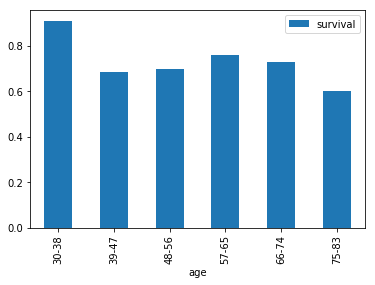

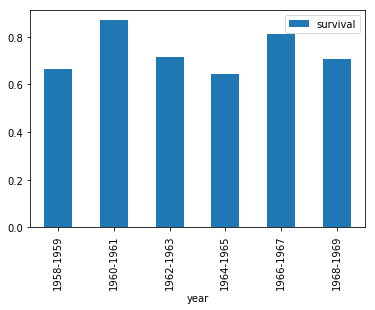

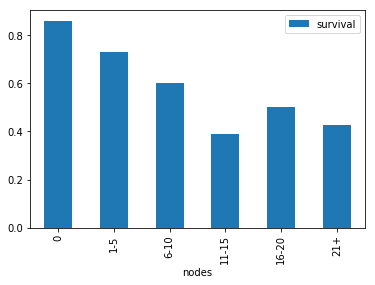

In [116]:
pt_age_survived = pd.pivot_table(df, values='survival', index=age_bins)
pt_age_survived

pt_age_survived.plot.bar()

pt_year_survived = pd.pivot_table(df, values='survival', index=year_bins)
pt_year_survived

pt_year_survived.plot.bar()

pt_nodes_survived = pd.pivot_table(df, values='survival', index=nodes_bins)
pt_nodes_survived

pt_nodes_survived.plot.bar()

             survival
age   nodes          
30-38 0      0.923077
      1-5    1.000000
      6-10   0.800000
      11-15  1.000000
      21+    0.500000
39-47 0      0.735294
      1-5    0.739130
      6-10   0.500000
      11-15  1.000000
      16-20  0.500000
      21+    0.000000
48-56 0      0.925926
      1-5    0.743590
      6-10   0.454545
      11-15  0.000000
      16-20  1.000000
      21+    0.500000
57-65 0      0.897436
      1-5    0.647059
      6-10   1.000000
      11-15  0.000000
      16-20  0.000000
      21+    0.600000
66-74 0      0.863636
      1-5    0.500000
      6-10   0.333333
      11-15  0.500000
75-83 0      1.000000
      1-5    0.500000



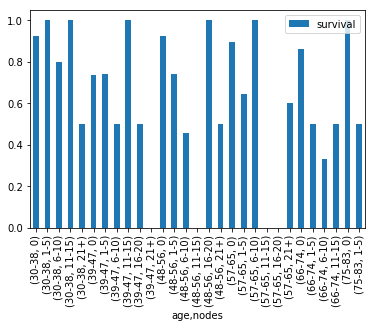

In [156]:
pt_age_nodes_survival = pd.pivot_table(df, values='survival', index=[age_bins, nodes_bins])

print(pt_age_nodes_survival)
print()

pt_age_nodes_survival.plot.bar()

year   1958-1959  1960-1961  1962-1963  1964-1965  1966-1967  1968-1969
age                                                                    
30-38   0.111111   0.185185   0.094340   0.084746   0.094340   0.083333
39-47   0.269841   0.166667   0.264151   0.271186   0.226415   0.208333
48-56   0.269841   0.333333   0.320755   0.237288   0.301887   0.333333
57-65   0.222222   0.259259   0.207547   0.288136   0.207547   0.166667
66-74   0.111111   0.055556   0.094340   0.084746   0.150943   0.208333
75-83   0.015873   0.000000   0.018868   0.033898   0.018868   0.000000



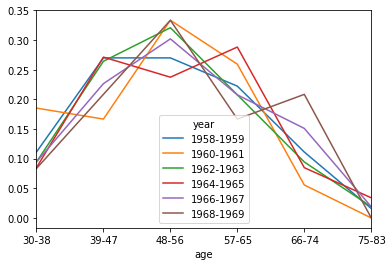

In [126]:
ct_age_year = pd.crosstab(age_bins, year_bins, normalize='columns')

print(ct_age_year)
print()

ct_age_year.plot()

# distribution of ages looks about the same each year

year   1958-1959  1960-1961  1962-1963  1964-1965  1966-1967  1968-1969
nodes                                                                  
0       0.380952   0.407407   0.433962   0.508475   0.490566   0.458333
1-5     0.396825   0.388889   0.320755   0.237288   0.301887   0.291667
6-10    0.095238   0.092593   0.056604   0.152542   0.075472   0.125000
11-15   0.079365   0.055556   0.056604   0.033898   0.075472   0.041667
16-20   0.015873   0.000000   0.056604   0.033898   0.037736   0.000000
21+     0.031746   0.055556   0.075472   0.033898   0.018868   0.083333



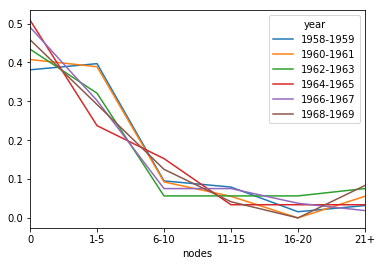

In [131]:
ct_nodes_year = pd.crosstab(nodes_bins, year_bins, normalize='columns')

print(ct_nodes_year)
print()

ct_nodes_year.plot()

# distribution of nodes looks about the same each year

age       30-38     39-47     48-56     57-65     66-74  75-83
nodes                                                         
0      0.382353  0.465753  0.300000  0.549296  0.666667    0.2
1-5    0.323529  0.315068  0.433333  0.239437  0.181818    0.8
6-10   0.147059  0.082192  0.122222  0.070423  0.090909    0.0
11-15  0.088235  0.041096  0.077778  0.042254  0.060606    0.0
16-20  0.000000  0.054795  0.022222  0.028169  0.000000    0.0
21+    0.058824  0.041096  0.044444  0.070423  0.000000    0.0



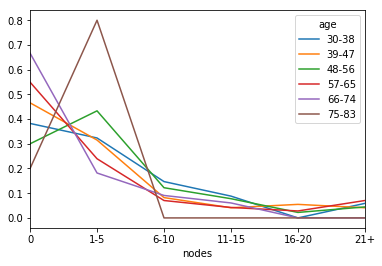

In [146]:
ct_nodes_age = pd.crosstab(nodes_bins, age_bins, normalize='columns')

print(ct_nodes_age)
print()

ct_nodes_age.plot()

In [0]:
import matplotlib.pyplot as plt

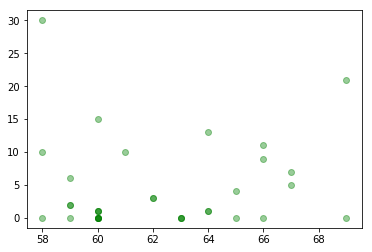

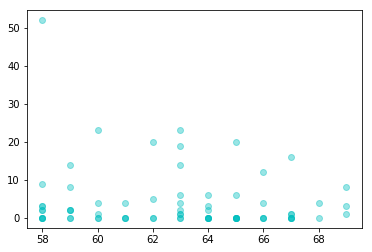

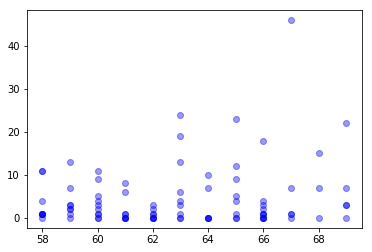

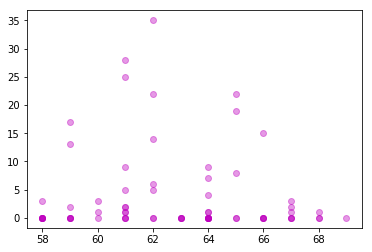

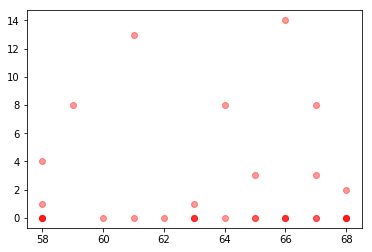

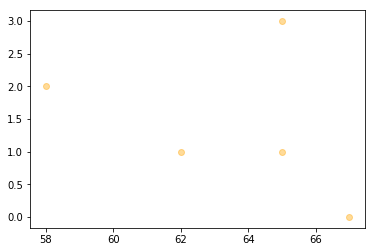

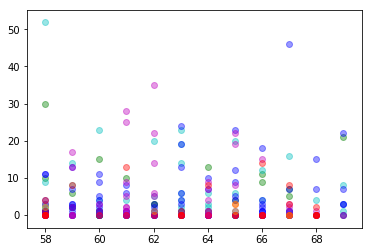

In [141]:
# controlling for age, year versus nodes

age_bin_1 = df[df.age < 39]
age_bin_2 = df[(df.age < 48) & (df.age >= 39)]
age_bin_3 = df[(df.age < 57) & (df.age >= 48)]
age_bin_4 = df[(df.age < 66) & (df.age >= 57)]
age_bin_5 = df[(df.age < 75) & (df.age >= 66)]
age_bin_6 = df[df.age >= 75]

# scatter for each age group

plt.scatter(age_bin_1.year, age_bin_1.nodes, color ='g', alpha = .4)
plt.show()
plt.scatter(age_bin_2.year, age_bin_2.nodes, color ='c', alpha = .4)
plt.show()
plt.scatter(age_bin_3.year, age_bin_3.nodes, color ='b', alpha = .4)
plt.show()
plt.scatter(age_bin_4.year, age_bin_4.nodes, color ='m', alpha = .4)
plt.show()
plt.scatter(age_bin_5.year, age_bin_5.nodes, color ='r', alpha = .4)
plt.show()
plt.scatter(age_bin_6.year, age_bin_6.nodes, color ='orange', alpha = .4)
plt.show()

# all color coded age groups together

plt.scatter(age_bin_1.year, age_bin_1.nodes, color ='g', alpha = .4)
plt.scatter(age_bin_2.year, age_bin_2.nodes, color ='c', alpha = .4)
plt.scatter(age_bin_3.year, age_bin_3.nodes, color ='b', alpha = .4)
plt.scatter(age_bin_4.year, age_bin_4.nodes, color ='m', alpha = .4)
plt.scatter(age_bin_5.year, age_bin_5.nodes, color ='r', alpha = .4)
plt.scatter(age_bin_6.year, age_bin_6.nodes, color ='orange', alpha = .4)
plt.show()

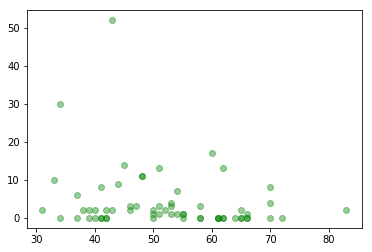

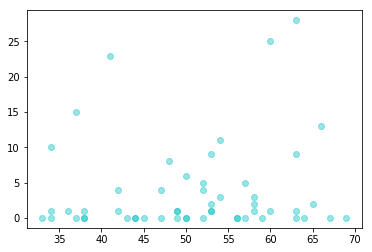

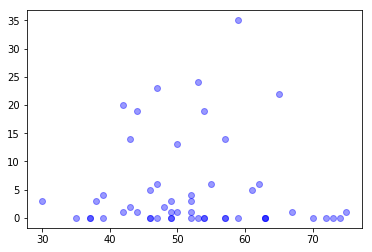

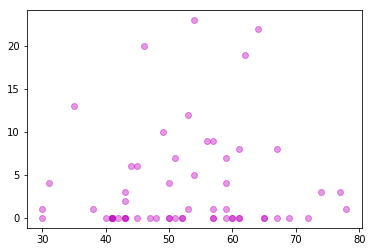

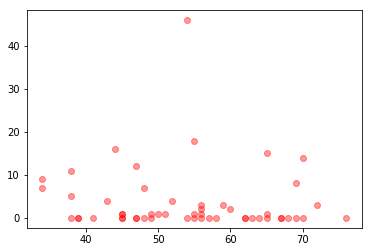

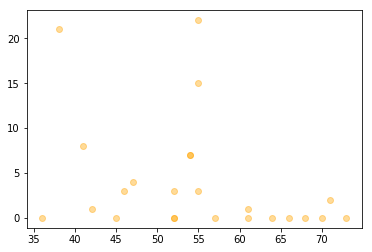

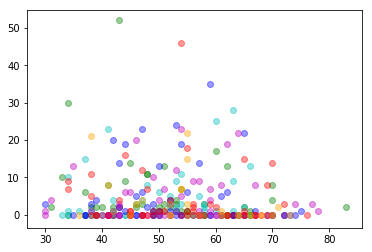

In [142]:
# controlling for year, age versus nodes

year_bin_1 = df[df.year < 60]
year_bin_2 = df[(df.year < 62) & (df.year >= 60)]
year_bin_3 = df[(df.year < 64) & (df.year >= 62)]
year_bin_4 = df[(df.year < 66) & (df.year >= 64)]
year_bin_5 = df[(df.year < 68) & (df.year >= 66)]
year_bin_6 = df[df.year >= 68]

# scatter for each year group

plt.scatter(year_bin_1.age, year_bin_1.nodes, color ='g', alpha = .4)
plt.show()
plt.scatter(year_bin_2.age, year_bin_2.nodes, color ='c', alpha = .4)
plt.show()
plt.scatter(year_bin_3.age, year_bin_3.nodes, color ='b', alpha = .4)
plt.show()
plt.scatter(year_bin_4.age, year_bin_4.nodes, color ='m', alpha = .4)
plt.show()
plt.scatter(year_bin_5.age, year_bin_5.nodes, color ='r', alpha = .4)
plt.show()
plt.scatter(year_bin_6.age, year_bin_6.nodes, color ='orange', alpha = .4)
plt.show()

# all color coded year groups together

plt.scatter(year_bin_1.age, year_bin_1.nodes, color ='g', alpha = .4)
plt.scatter(year_bin_2.age, year_bin_2.nodes, color ='c', alpha = .4)
plt.scatter(year_bin_3.age, year_bin_3.nodes, color ='b', alpha = .4)
plt.scatter(year_bin_4.age, year_bin_4.nodes, color ='m', alpha = .4)
plt.scatter(year_bin_5.age, year_bin_5.nodes, color ='r', alpha = .4)
plt.scatter(year_bin_6.age, year_bin_6.nodes, color ='orange', alpha = .4)
plt.show()

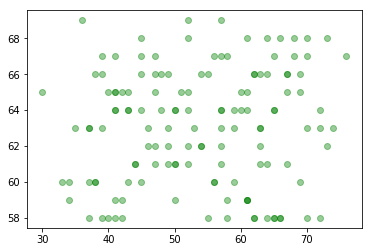

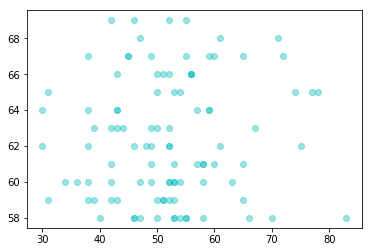

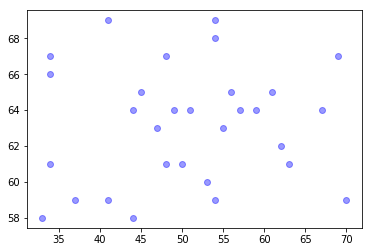

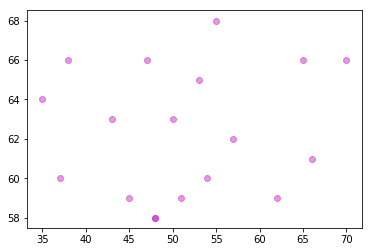

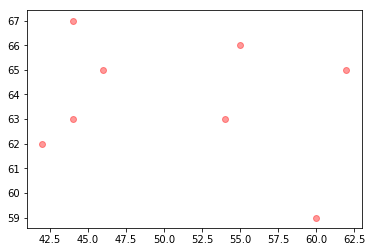

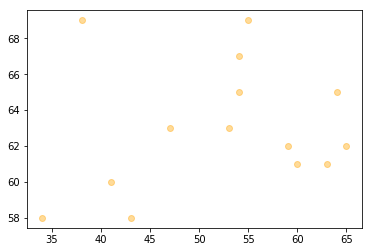

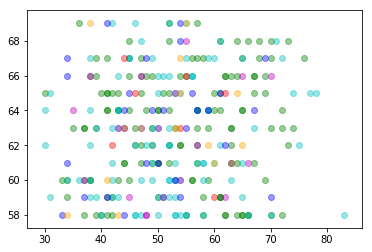

In [143]:
# controlling for nodes, age versus year

nodes_bin_1 = df[df.nodes == 0]
nodes_bin_2 = df[(df.nodes < 6) & (df.nodes >= 1)]
nodes_bin_3 = df[(df.nodes < 11) & (df.nodes >= 6)]
nodes_bin_4 = df[(df.nodes < 16) & (df.nodes >= 11)]
nodes_bin_5 = df[(df.nodes < 21) & (df.nodes >= 16)]
nodes_bin_6 = df[df.nodes >= 21]

# scatter for each nodes group

plt.scatter(nodes_bin_1.age, nodes_bin_1.year, color ='g', alpha = .4)
plt.show()
plt.scatter(nodes_bin_2.age, nodes_bin_2.year, color ='c', alpha = .4)
plt.show()
plt.scatter(nodes_bin_3.age, nodes_bin_3.year, color ='b', alpha = .4)
plt.show()
plt.scatter(nodes_bin_4.age, nodes_bin_4.year, color ='m', alpha = .4)
plt.show()
plt.scatter(nodes_bin_5.age, nodes_bin_5.year, color ='r', alpha = .4)
plt.show()
plt.scatter(nodes_bin_6.age, nodes_bin_6.year, color ='orange', alpha = .4)
plt.show()

# all color coded nodes groups together

plt.scatter(nodes_bin_1.age, nodes_bin_1.year, color ='g', alpha = .4)
plt.scatter(nodes_bin_2.age, nodes_bin_2.year, color ='c', alpha = .4)
plt.scatter(nodes_bin_3.age, nodes_bin_3.year, color ='b', alpha = .4)
plt.scatter(nodes_bin_4.age, nodes_bin_4.year, color ='m', alpha = .4)
plt.scatter(nodes_bin_5.age, nodes_bin_5.year, color ='r', alpha = .4)
plt.scatter(nodes_bin_6.age, nodes_bin_6.year, color ='orange', alpha = .4)
plt.show()

             survival
age   nodes          
30-38 0      0.923077
      1-5    1.000000
      6-10   0.800000
      11-15  1.000000
      21+    0.500000
39-47 0      0.735294
      1-5    0.739130
      6-10   0.500000
      11-15  1.000000
      16-20  0.500000
      21+    0.000000
48-56 0      0.925926
      1-5    0.743590
      6-10   0.454545
      11-15  0.000000
      16-20  1.000000
      21+    0.500000
57-65 0      0.897436
      1-5    0.647059
      6-10   1.000000
      11-15  0.000000
      16-20  0.000000
      21+    0.600000
66-74 0      0.863636
      1-5    0.500000
      6-10   0.333333
      11-15  0.500000
75-83 0      1.000000
      1-5    0.500000



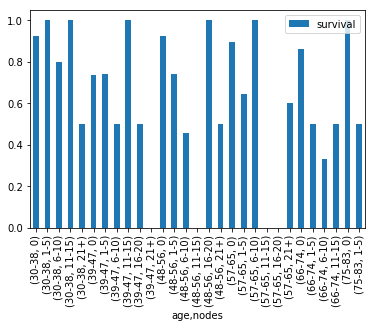

In [155]:
pt_age_nodes_survival = pd.pivot_table(df, values='survival', index=[age_bins, nodes_bins])

print(pt_age_nodes_survival)
print()

pt_age_nodes_survival.plot.bar()

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?

It appears that patients under forty are more likely to survive than patients over forty.

- What is at least one feature that looks to have a negative relationship with survival?

It appears that the likelihood of survival decreases as the number of detected positive axillary nodes increases.

- How are those two features related with each other, and what might that mean?

People aged 48-56 are more likely to have 1-5 nodes detected than to have no nodes detected, which makes the 48-56 age group different from other age groups (we see the same trend in people aged 75-83, but that is an extremly small and unreliable sample size). Having nodes detected and being over forty makes survival less likely, and being over forty makes it more likely that nodes will be detected.